<center>
    <h1>Basis Sets</h1>
<center>
<br>
<table>
  <tr>
      <td><p><h1>Team Rutgers</h1></p><p><h2>(Michele, Ezekiel & Valeria)</h2></p><p><h2>Rutgers University-Newark</h2></p></td> 
      <td><img src="./figures/logos/run.png" width=300 height=300 /></td>
  </tr>
  <tr>
    <td></td>
    <td> https://prg.rutgers.edu</td>
  </tr>
</table>
<br>
<h3>Retrieve this presentation at:</h3>
<br>
<center>https://github.com/Quantum-MultiScale-Template/DFT-Intro/2025</center>

<br>

#### ASESMA 2025 -- Accra, Ghana -- June 10, 2025


# Split into groups

 - Assign number to each student
 - group based on `mod(N,5)`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.mod(7,5)

2

# My assumptions

 - Basic linear algebra (vectors, matrices, operators, wavefunctions)
 - Dirac notation (i.e., i-th vector $\to |i\rangle$ or $|\psi_i\rangle$, scalar product between <i>i</i> and <i>j</i> $\to \langle \psi_i | \psi_j\rangle$)
 - Kohn-Sham equations

# Why are basis sets needed?

 - They provide a representation
 - Allow us to discretize the problem

# Let's expand a function in a basis

$$
\psi_k(r) = \sum_i C_{ik} \chi_i(r)
$$

 - $\{\chi_i(r)\}$ are basis functions forming a <b>basis set</b>
 - $\{C_{ik}\}$ are expansion coefficients, $C_{ik}\in \mathbb{C}$

# Challenge 1
- Provide one example of basis functions and explain why they are useful

# Examples of basis sets

 - Plane waves (PW)
$$
 \chi_{G}(r) = \frac{1}{\sqrt{\Omega}} e^{iGr}
$$

 - Gaussian-Type Orbitals (GTOs)
 $$
 \chi_{\mu,\alpha}(r) = \left(\frac{2\alpha}{\pi}\right)^{d/2} e^{-\alpha |r-\mu|^2}
 $$

 - Numerical Orbitals
 - ...

# What do they look like? Let's use `Python`

In [3]:
L=10; X = np.linspace(start=0,stop=L,num=1000,endpoint=False)
def pw(x,G):
    return 1.0/np.sqrt(L)*np.exp(1j*G*X)
def gto(x,center,alpha):
    return np.sqrt(alpha/np.pi)*np.exp(-alpha*(x-center)**2)

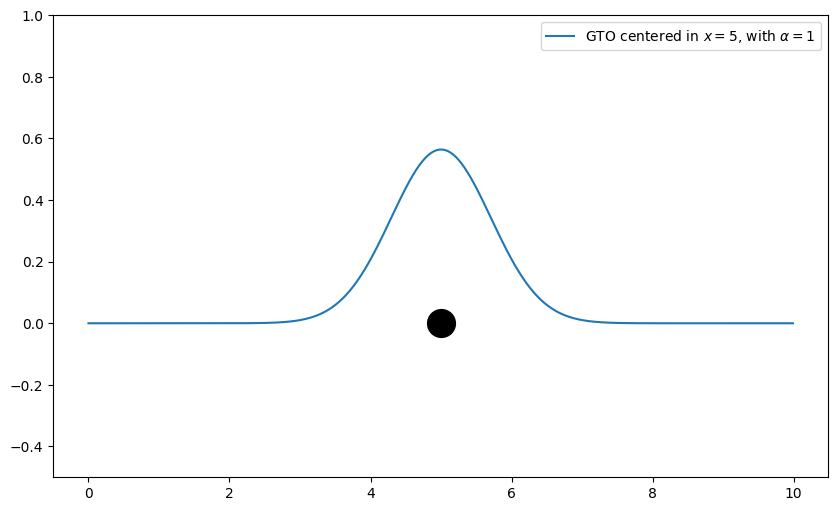

In [4]:
fig = plt.figure(figsize=(10,6))
#plt.plot(X,np.real(pw(X,G=1)), label=r"Re of PW with $G=1$")
#plt.plot(X,np.imag(pw(X,G=1)), label=r"Im of PW with $G=1$")
plt.plot(X,gto(X,center=5,alpha=1),label=r"GTO centered in $x=5$, with $\alpha=1$")
plt.ylim([-.5,1]); plt.legend(); plt.plot(5, 0, 'ko', markersize=20);

# Challenge 2
 - Discretize the KS equations using a basis set $\{\chi_i(r)\}$ knowing you can write the KS orbitals as $\psi_k(r) = \sum_i C_{ik} \chi_i(r)$ and the KS Hamiltonian matrix elements are $H_{ij}=\langle \chi_i | \hat H | \chi_j \rangle$ and the overlap elements among the basis functions are $S_{ij}=\langle \chi_i|\chi_j\rangle$.
 - The final result should be 
 $$\sum_i H_{ji}C_{ik} = \varepsilon_k \sum_i C_{ik}S_{ji} ~\text{ or in matrix form }~ \mathbb{HC}=\mathbb{SC\varepsilon}$$ 

# Challenge 3
 - Are GTOs an orthonormal basis set? Justify.
 - Are PWs an orthonormal basis set? Justify.
 
 The condition for orthonormality $S_{ij}=\delta_{ij}$.

# Size of basis sets

 - To be useful, basis sets should have reduced size,
    $$ \psi_k(r) = \sum_{i=1}^{M} C_{ik} \chi_i(r), ~ \text{where}~M<+\infty$$

 - For PW basis, this usually means imposing a cutoff on the maximum value of $G$
 

# Challenge 4
This is to help you breeze through what we will do next.
 - Find the wavefunctions that solve the time-independent Schrödinger equation of a single particle of mass $m=1$ in a periodic 1D box of size $L$. Use atomic units ($\hbar = 1$) throughout.

# PW cutoff in 1D - let's use FFT

 - First, let's discretize a 1D box of length $L=10$ au into $N$ points, $\{x_k=\frac{k}{N}L\}$
<center><img src="./figures/science/line.png" width=400 /></center>

In [11]:
N=7; L=10; x = np.linspace(start=0,stop=L,num=N, endpoint=False); x

array([0.        , 1.42857143, 2.85714286, 4.28571429, 5.71428571,
       7.14285714, 8.57142857])

 - Second, we generate all the available $G$ points according to <a href="https://numpy.org/doc/stable/reference/routines.fft.html">FFT</a>: $~e^{iG_j x_k}=e^{i\left(\frac{2\pi j}{L}\right) \left(\frac{k}{N}L\right)}=e^{i2\pi \frac{jk}{N}}$

 - Thus: as $x_k=\frac{k}{N}L$, it must be that $G_j = \frac{2\pi j}{L}$ with $j=0,\pm 1, \pm 2,\ldots \pm \frac{N}{2}$
<center><img src="./figures/science/lineg.png" width=400 /></center>

In [6]:
G = (2*np.pi)*np.fft.fftfreq(N,d=L/N); G

array([ 0.        ,  0.62831853,  1.25663706,  1.88495559, -1.88495559,
       -1.25663706, -0.62831853])

<center>
    <div class="alert alert-success">
        Note: higher $N$ &rarr; higher maximum value of $G$
    </div>
</center>

# Effect of a PW cutoff

Now compute the Fourier transform of $f(x)$, $\tilde f(G)$
$$
\tilde f(G) = \int dx f(x) e^{-iG x} \simeq \frac{L}{N}\sum_{i=0}^{N-1} f_i e^{-i G x_i}
$$

In [7]:
f = gto(x,center=5,alpha=1)

tilde_f = np.fft.fft(f)*L/N

Now compute the inverseFourier transform
$$
f(x) = \frac{1}{\Omega}\int dG \tilde f(G) e^{i G x} \sim \frac{1}{L}\sum_{i=0}^{N-1} \tilde f_i e^{i G_i
x}
$$

In [8]:
def gto_in_pw(fft,G,X):
    N=len(G); f_X = np.zeros_like(X,dtype=np.complex128)
    for i in range(N):
        f_X += fft[i]*np.exp(1j*G[i]*X)  
    return np.real(f_X)/L

# Plot of the effect of a PW cutoff

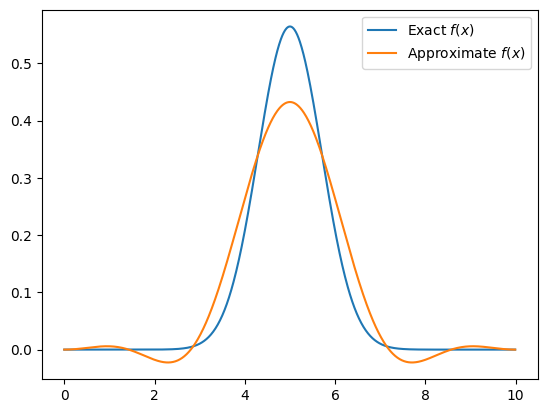

In [9]:
plt.plot(X,gto(X,center=5,alpha=1),label=r"Exact $f(x)$")
plt.plot(X,gto_in_pw(tilde_f,G,X),label=r"Approximate $f(x)$")
plt.legend()

# Challenge 5
 - What is an appropriate number of PWs for representing $f(x)$? Discuss within the group and provide a quantitative justification.

# Why are PW basis so useful?

 - Orthonormal! 

 - Systematically improvable: higher $N$ (or equivalently $\max\left[ G \right]$) leads to better results. 

 - Evaluation of the kinetic energy operator and solution of the Poisson equation are <b>easy</b>

# Matrix elements of the kinetic energy operator, needed to solve $\mathbb{HC=C\varepsilon}$

$$
\langle \chi_i | \hat T | \chi_j \rangle = -\frac{1}{2\Omega} \int dx  (-G_j^2)  e^{i(G_j-G_i)}x = \mathbf{\color{red}{\frac{G_j^2}{2}\delta_{ij}}}
$$

<center> It's diagonal!</center>

# Classical Coulomb (Hartree) interaction energy and potential

$$
v_H(r) = \int dr' \frac{n(r')}{|r-r'|} \equiv n \star \frac{1}{|r|}
$$

<center>
    <div class="alert alert-success">
        Let's use convolution theorem: $f = h \star g \to \tilde f = \tilde h \cdot \tilde g$
    </div>
</center>

$$
\tilde v_H(G) = \tilde n(G) \frac{4\pi}{G^2} \to v_H(r) = \frac{1}{\Omega}\int \tilde v_H(G) e^{iGr}dG = \frac{1}{\Omega}\int \tilde n(G) \frac{4\pi}{G^2} e^{iGr}dG
$$

<center>
    <div class="alert alert-success">
        <b>Thanks to FFT, the potential is computed with a $\mathcal{O}(N\ln N)$ number of operations!
    </div>
</center>

# Matrix elements of $v_s(r)$, needed to solve $\mathbb{HC=C\varepsilon}$

$$
\langle \chi_i | v_s | \chi_j\rangle = \frac{1}{\Omega}\int dr v_s(r) e^{i(G_j-G_i)r} 
$$

<center>
    <div class="alert alert-danger">
        <b>Not a diagonal matrix</b>
    </div>
</center>

But... we can use the $G$ components of $\tilde v_s(G)$:
$$
\langle \chi_i | v_s | \chi_j\rangle = \frac{1}{\Omega}\tilde v_s(G_i-G_j)
$$
which gives the matrix elements of $v_s$ <b>almost</b> directly.